

 <p style="font-family:newtimeroman; font-size:200%; text-align:center; color:#34661c;">

  🧠 <b>Time Series Analysis On Bitcoin</b> 📊

</p>



---



## ✨ **Before We Dive In**:

Welcome to your **comprehensive guide** on **Time Series Analysis**! This notebook is designed for **data enthusiasts** who want to explore the fascinating world of time series forecasting. Whether you're new to this field or an experienced professional, you'll find a mix of **powerful tools**, **beautiful visualizations**, and **advanced models** to help you succeed. 🌟  

**Let's begin this exciting journey together!** 🚀



---



### 📚 **Table of Contents**:



1. **About the Dataset 📊**  

   Understanding the data we'll work with.

   

2. **Data Preprocessing 🛠️**  

   Cleaning and preparing data for analysis.



3. **Exploratory Data Analysis (EDA) 🔍**  

   Visualizing patterns and trends in the dataset.

   

4. **Feature Engineering ⚙️**  

   Extracting meaningful features from the data.



5. **Modeling 📈**  

    - **ARIMA 📉**  

    - **SARIMA 📅**  

    - **Prophet 🔮**  

    - **RNN 🧠**  

    - **LSTM 🕰️**  

    - **GRU 🔄**



6. **Model Comparison 📊**  

   Comparing the performance of different models.



---






# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#34661c;">IMPORT_LIBRARIES</p>

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly.express as px
import plotly.graph_objects as go

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Matplotlib and Seaborn configurations
plt.rcParams["figure.figsize"] = (10, 6)
sns.set_style("whitegrid")

# Pandas display configurations
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', None)  # Display all columns

# Ready for Data Analysis and Visualization


In [24]:
# Load the data

DATA = 'data/Bitcoin_Historical_Data.csv'

df = pd.read_csv(DATA)  # Read the CSV file into a DataFrame.



# Convert 'Date' to datetime format

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # Convert the 'Date' column to datetime. Invalid formats will become NaT.



# Check for invalid dates

if df['Date'].isnull().any():  # If there are null values in 'Date' after conversion:

    print("Warning: Some dates could not be parsed. Check the dataset for invalid date formats.")



# Extract the year

df['year'] = df['Date'].dt.year  # Extract the year from the 'Date' column and create a new 'year' column.



# Calculate the 'dollars' column

df['dollars'] = 0.5 * (df['High'] + df['Low']) * df['Volume']  # Estimate trading value based on price and volume.



# Display the first few rows of the updated DataFrame

df.head()


,Date,Adj Close,Close,High,Low,Open,Volume,year,dollars
0,2014-09-17 00:00:00+00:00,457.334,457.334,468.174,452.422,465.864,21056800,2014,9692403013.794
1,2014-09-18 00:00:00+00:00,424.440,424.440,456.860,413.104,456.860,34483200,2014,14999571117.188
2,2014-09-19 00:00:00+00:00,394.796,394.796,427.835,384.532,424.103,37919700,2014,15402356548.270
3,2014-09-20 00:00:00+00:00,408.904,408.904,423.296,389.883,394.673,36863600,2014,14988352426.703
4,2014-09-21 00:00:00+00:00,398.821,398.821,412.426,393.181,408.085,26580100,2014,10706557238.968


# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#34661c;">DATA_INSPECTION</p>

In [25]:
df.shape

(3724, 9)

In [26]:
df.head()

,Date,Adj Close,Close,High,Low,Open,Volume,year,dollars
0,2014-09-17 00:00:00+00:00,457.334,457.334,468.174,452.422,465.864,21056800,2014,9692403013.794
1,2014-09-18 00:00:00+00:00,424.440,424.440,456.860,413.104,456.860,34483200,2014,14999571117.188
2,2014-09-19 00:00:00+00:00,394.796,394.796,427.835,384.532,424.103,37919700,2014,15402356548.270
3,2014-09-20 00:00:00+00:00,408.904,408.904,423.296,389.883,394.673,36863600,2014,14988352426.703
4,2014-09-21 00:00:00+00:00,398.821,398.821,412.426,393.181,408.085,26580100,2014,10706557238.968


In [27]:
df.tail()

,Date,Adj Close,Close,High,Low,Open,Volume,year,dollars
3719,2024-11-22 00:00:00+00:00,98997.664,98997.664,99655.500,97222.664,98496.430,78473580551,2024,7724867233145794.000
3720,2024-11-23 00:00:00+00:00,97777.281,97777.281,99014.680,97232.891,99006.742,44414644677,2024,4358133052077130.500
3721,2024-11-24 00:00:00+00:00,98013.820,98013.820,98647.180,95788.078,97778.094,51712020623,2024,5027320030919161.000
3722,2024-11-25 00:00:00+00:00,93102.297,93102.297,98935.031,92642.914,98033.445,80909462490,2024,7750234290086495.000
3723,2024-11-26 00:00:00+00:00,91985.320,91985.320,94991.750,90770.812,93087.281,91656519855,2024,8513174999048464.000


In [28]:
# checkin the clos price of bitcoin last

print((df['Close']).max())

print((df['Date']).max())

98997.6640625
2024-11-26 00:00:00+00:00


In [29]:
# checkin the clos price of bitcoin min

print((df['Close']).min())

print((df['Date']).min())

178.10299682617188
2014-09-17 00:00:00+00:00


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3724 entries, 0 to 3723
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   Date       3724 non-null   datetime64[ns, UTC]
 1   Adj Close  3724 non-null   float64            
 2   Close      3724 non-null   float64            
 3   High       3724 non-null   float64            
 4   Low        3724 non-null   float64            
 5   Open       3724 non-null   float64            
 6   Volume     3724 non-null   int64              
 7   year       3724 non-null   int32              
 8   dollars    3724 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(6), int32(1), int64(1)
memory usage: 247.4 KB


In [31]:
print("Summary Statistics:\n", df.describe())


Summary Statistics:
        Adj Close     Close      High       Low      Open           Volume  \
count   3724.000  3724.000  3724.000  3724.000  3724.000         3724.000   
mean   18848.683 18848.683 19251.922 18381.434 18825.294  18148784739.863   
std    20873.547 20873.547 21309.793 20365.354 20843.084  19758588385.840   
min      178.103   178.103   211.731   171.510   176.897      5914570.000   
25%     1198.755  1198.755  1217.055  1178.120  1192.668    351945744.000   
50%     9284.764  9284.764  9440.763  9134.779  9284.071  14428580410.500   
75%    30182.015 30182.015 30605.878 29580.906 30153.409  29198284972.500   
max    98997.664 98997.664 99655.500 97232.891 99006.742 350967941479.000   

          year               dollars  
count 3724.000              3724.000  
mean  2019.302   610461215323973.000  
std      2.954  1047990037192358.875  
min   2014.000        2307853373.308  
25%   2017.000      393348434777.591  
50%   2019.000   183431469956273.750  
75%   2022.0

# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#34661c;">Expolatory Data Analysis (EDA)</p>

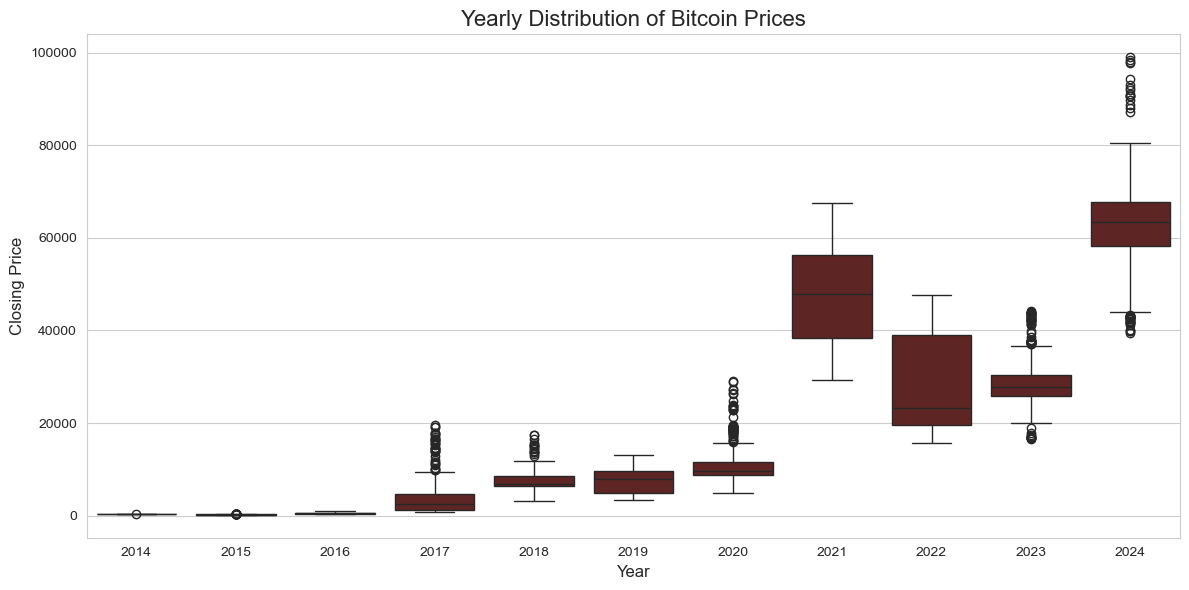

In [32]:
# Plot the yearly distribution using a box plot

plt.figure(figsize=(12, 6))

sns.boxplot(x='year', y='Close', data=df, color='#661d1c')

plt.title('Yearly Distribution of Bitcoin Prices', fontsize=16)

plt.xlabel('Year', fontsize=12)

plt.ylabel('Closing Price', fontsize=12)

plt.tight_layout()

plt.show()

<Axes: xlabel='Date', ylabel='Close'>

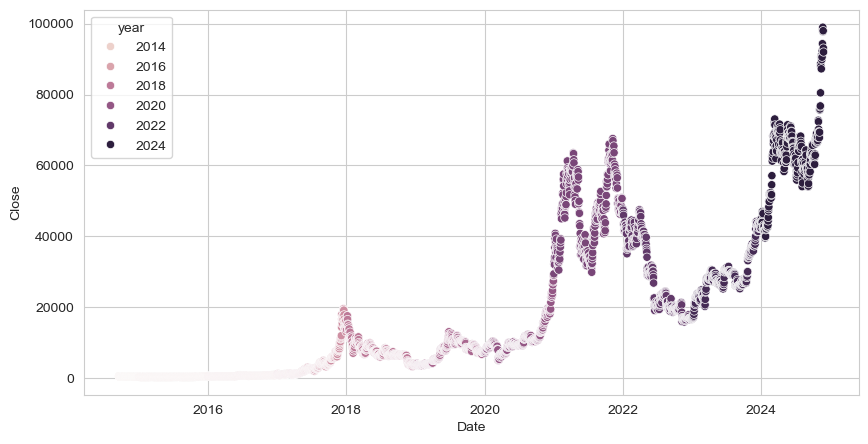

In [33]:
# Plot the yearly distribution using a box plot
from seaborn import scatterplot

plt.figure(figsize=(10, 5))

scatterplot(data=df, x='Date', y='Close', hue='year', color='#ab2222')

## <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#34661c;">Bitcoin Closing Price Over Time</p>

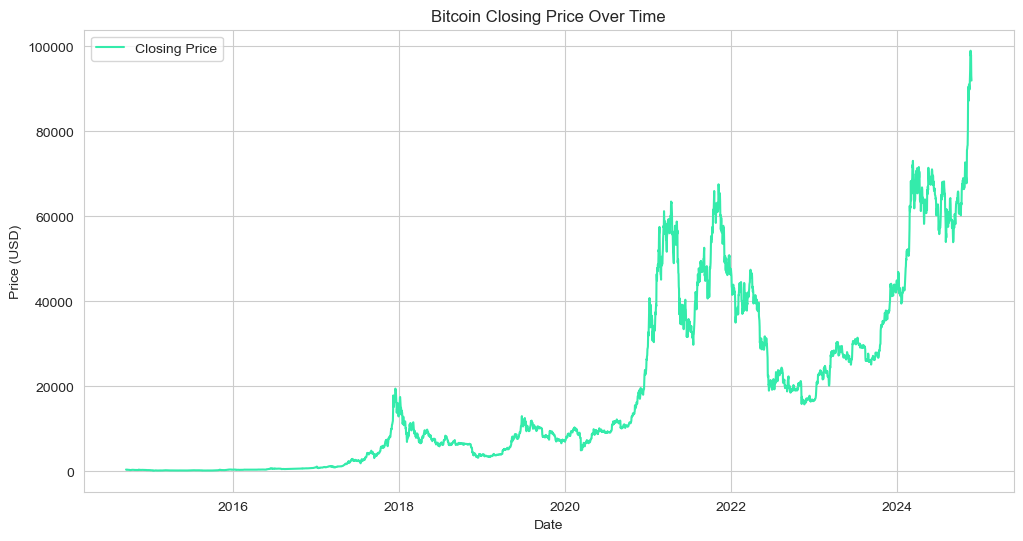

In [34]:


plt.figure(figsize=(12, 6))

sns.lineplot(data=df, x='Date', y='Close', label='Closing Price', color='#34ebab')

plt.title('Bitcoin Closing Price Over Time')

plt.xlabel('Date')

plt.ylabel('Price (USD)')

plt.legend()

plt.show()


![GIF Title](https://media.giphy.com/media/0XJeBn8nx6HDwdWIDg/giphy.gif?cid=790b76118s4nxzfeooj1inznhoiemztzglcrmz5lw0iqsa1j&ep=v1_gifs_search&rid=giphy.gif&ct=g)


## <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#34661c;">Bitcoin Daily Price Range</p>

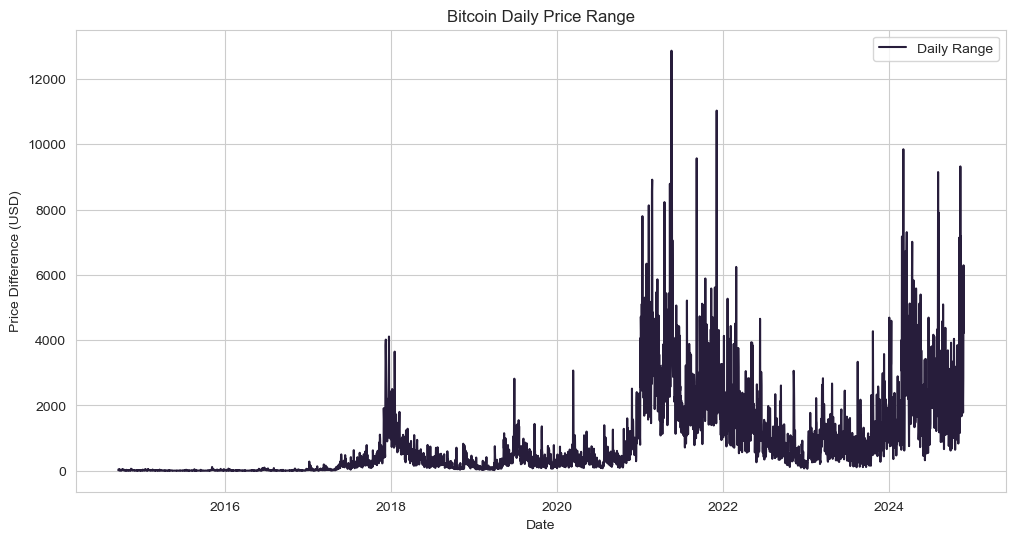

In [35]:
plt.figure(figsize=(12, 6))

sns.lineplot(data=df, x='Date', y=df['High'] - df['Low'], label='Daily Range',color='#271d3b')

plt.title('Bitcoin Daily Price Range')

plt.xlabel('Date')

plt.ylabel('Price Difference (USD)')

plt.legend()

plt.show()








## Purpose of the Plot:

This plot helps:

1. **Analyze Trends**: 

   - It shows how the `Close` price of Bitcoin changes over time (years in this case).

2. **Identify Relationships**:

   - By fitting a regression line, it provides insights into whether the relationship between `year` and `Close` is increasing, decreasing, or constant.

3. **Spot Outliers**:

   - Scatter points that deviate significantly from the regression line can be outliers.


<Axes: xlabel='year', ylabel='Close'>

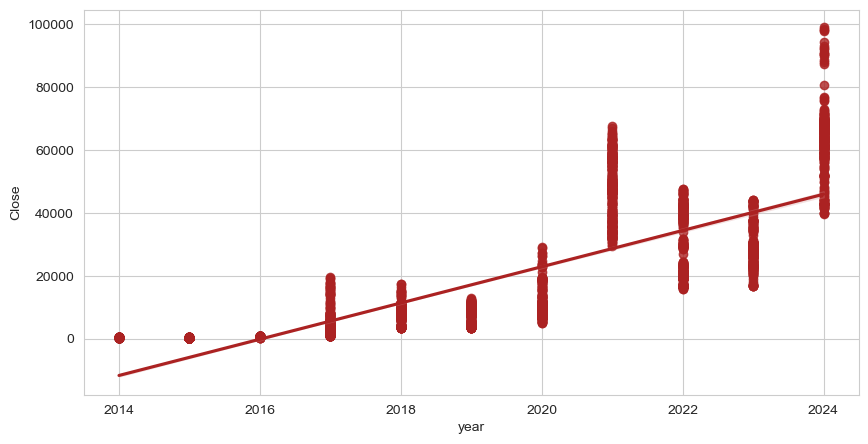

In [36]:
from seaborn import regplot



plt.figure(figsize=(10, 5))

regplot(data=df, x='year', y='Close',color='#ab2222') 

## <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#34661c;">Bitcoin Volume Traded</p>

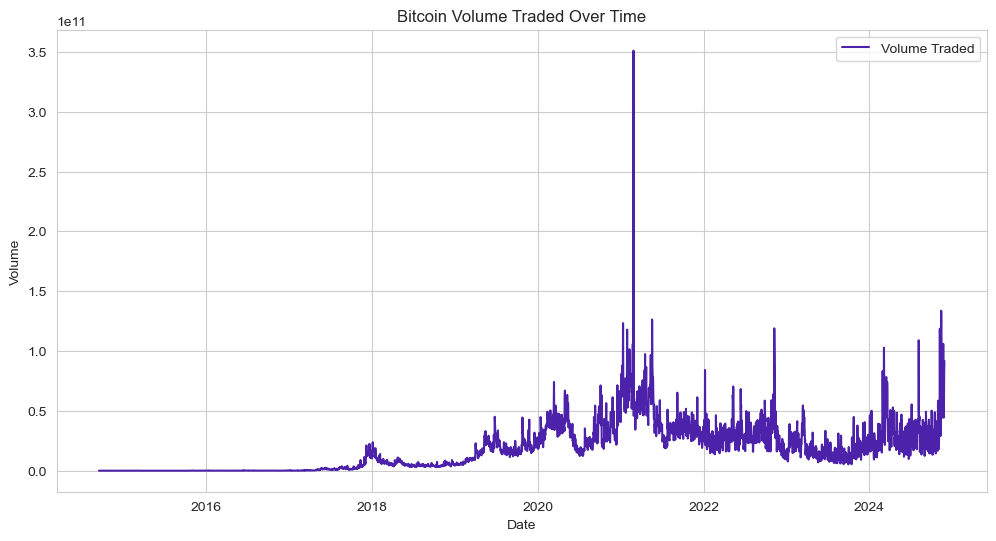

In [37]:
plt.figure(figsize=(12, 6))

sns.lineplot(data=df, x='Date', y='Volume', label='Volume Traded',color='#4d22ab')

plt.title('Bitcoin Volume Traded Over Time')

plt.xlabel('Date')

plt.ylabel('Volume')

plt.legend()

plt.show()


In [38]:
# plot the correlation matrix of the data

corr = df.corr()

corr.style.background_gradient(cmap='coolwarm')


,Date,Adj Close,Close,High,Low,Open,Volume,year,dollars
Date,1.000000,0.817026,0.817026,0.815427,0.819309,0.817031,0.632858,0.995200,0.558248
Adj Close,0.817026,1.000000,1.000000,0.999599,0.999486,0.999025,0.654523,0.815350,0.811738
Close,0.817026,1.000000,1.000000,0.999599,0.999486,0.999025,0.654523,0.815350,0.811738
High,0.815427,0.999599,0.999599,1.000000,0.999183,0.999551,0.661160,0.813900,0.816993
Low,0.819309,0.999486,0.999486,0.999183,1.000000,0.999324,0.645355,0.817393,0.803929
Open,0.817031,0.999025,0.999025,0.999551,0.999324,1.000000,0.654951,0.815374,0.811309
Volume,0.632858,0.654523,0.654523,0.661160,0.645355,0.654951,1.000000,0.638235,0.833192
year,0.995200,0.815350,0.815350,0.813900,0.817393,0.815374,0.638235,1.000000,0.560943
dollars,0.558248,0.811738,0.811738,0.816993,0.803929,0.811309,0.833192,0.560943,1.000000


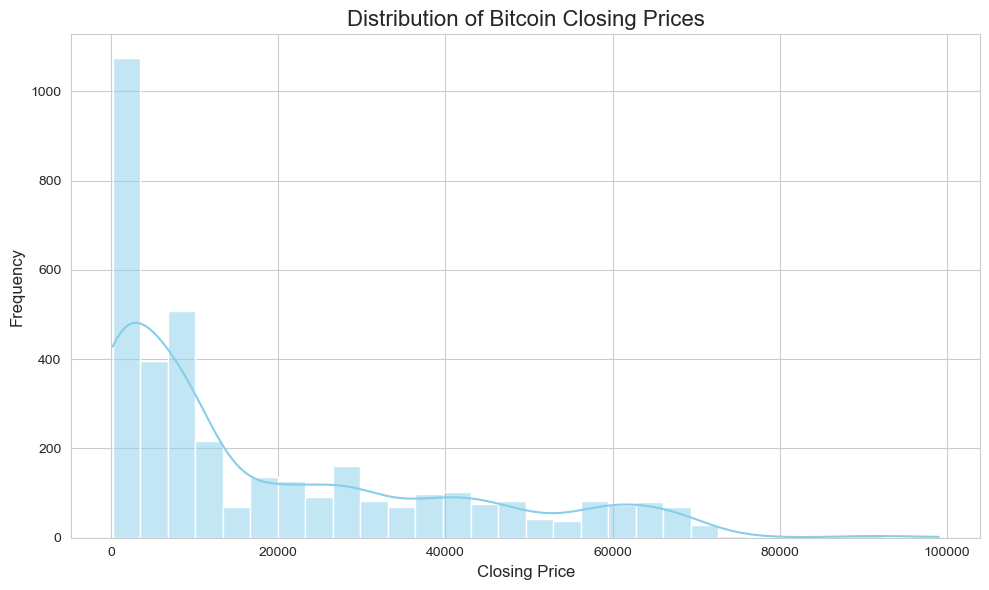

In [39]:


# Plotting the histogram

plt.figure(figsize=(10, 6))

sns.histplot(df['Close'], bins=30, kde=True, color='skyblue')

# Adding titles and labels

plt.title('Distribution of Bitcoin Closing Prices', fontsize=16)

plt.xlabel('Closing Price', fontsize=12)

plt.ylabel('Frequency', fontsize=12)



# Display the plot

plt.tight_layout()

plt.show()


# <div style="color:white;border-radius:80px;background-color:chocolate;font-family:Nexa;overflow:hidden"><p style="padding:5px;color:white;text-align:center;overflow:hidden;font-size:130%;letter-spacing:0.5px;margin:0"><b> </b>  Data Preprocessing  Deep Learning Models </p></div>

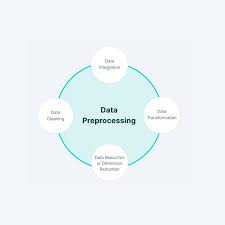

In [40]:
# Create a new dataframe with only the 'Close column 

data = df.filter(['Close'])

# Convert the dataframe to a numpy array

dataset = data.values

# Get the number of rows to train the model on

training_data_len = int(np.ceil( len(dataset) * .95 ))



training_data_len

3538

# <div style="color:white;display:inline-block;border-radius:50px;background-color:brown;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:white;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b> </b> Scaling </p></div>



## Which models require scaling? <br>



#### 1. ARIMA and SARIMA: 

These models typically do not require scaling because they work with the raw time series data. However, if your data has a wide range of values or if you're dealing with different scales across features, scaling might help improve model performance.



#### 2.LSTM : 

These models often benefit from scaling, especially if you are using activation functions like sigmoid or tanh, which are sensitive to the scale of the input data. Scaling helps stabilize training by putting all features on a similar scale, which can speed up convergence and prevent exploding gradients.

In [41]:
# Scale the data

from sklearn.preprocessing import MinMaxScaler



scaler = MinMaxScaler(feature_range=(0,1))

scaled_data = scaler.fit_transform(dataset)



scaled_data

array([[0.00282567],
       [0.0024928 ],
       [0.00219281],
       ...,
       [0.99004404],
       [0.9403421 ],
       [0.92903891]])

In [42]:
# Create the training data set 

# Create the scaled training data set

train_data = scaled_data[0:int(training_data_len), :]

# Split the data into x_train and y_train data sets

x_train = []

y_train = []



for i in range(60, len(train_data)):

    x_train.append(train_data[i-60:i, 0])

    y_train.append(train_data[i, 0])

    if i<= 61:

        print(x_train)

        print(y_train)

        print()

        

# Convert the x_train and y_train to numpy arrays 

x_train, y_train = np.array(x_train), np.array(y_train)



# Reshape the data

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# x_train.shape

[array([0.00282567, 0.0024928 , 0.00219281, 0.00233558, 0.00223355,
       0.00226725, 0.00260766, 0.0024803 , 0.0023626 , 0.00229025,
       0.00224062, 0.00201456, 0.00199722, 0.00211336, 0.00207967,
       0.00199322, 0.00183576, 0.00152564, 0.00144108, 0.00153791,
       0.00159972, 0.00176926, 0.00189156, 0.00185651, 0.00186396,
       0.0020284 , 0.00214847, 0.00225428, 0.00219258, 0.00206895,
       0.00208112, 0.00215887, 0.00213969, 0.00207188, 0.00210861,
       0.00207504, 0.00182468, 0.00182395, 0.00171189, 0.00178711,
       0.00176975, 0.00181659, 0.00159369, 0.00169199, 0.00162132,
       0.0014941 , 0.00149554, 0.00151236, 0.00154209, 0.00163311,
       0.00173232, 0.00166275, 0.00169384, 0.00187373, 0.00191077,
       0.00191857, 0.0024839 , 0.0024553 , 0.0022234 , 0.00200396])]
[0.0021228488513504243]

[array([0.00282567, 0.0024928 , 0.00219281, 0.00233558, 0.00223355,
       0.00226725, 0.00260766, 0.0024803 , 0.0023626 , 0.00229025,
       0.00224062, 0.00201456, 0.

## <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#34661c;">LSTM Model</p>

In [43]:
from keras.models import Sequential

from keras.layers import Dense, LSTM



# Build the LSTM model

model = Sequential()

model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))

model.add(LSTM(64, return_sequences=False))

model.add(Dense(25))

model.add(Dense(1))



# Compile the model

model.compile(optimizer='adam', loss='mean_squared_error')



# Train the model

model.fit(x_train, y_train, batch_size=1, epochs=2)

2024-12-04 14:39:57.427751: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2024-12-04 14:39:57.427771: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 18.00 GB
2024-12-04 14:39:57.427789: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 6.00 GB
2024-12-04 14:39:57.427823: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-12-04 14:39:57.427833: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/2


2024-12-04 14:39:58.036306: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


3478/3478 ━━━━━━━━━━━━━━━━━━━━ 46s 12ms/step - loss: 0.0019
Epoch 2/2
3478/3478 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - loss: 4.3898e-04


In [44]:
# Create the testing data set

test_data = scaled_data[training_data_len - 60: , :]

# Create the data sets x_test and y_test

x_test = []

y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):

    x_test.append(test_data[i-60:i, 0])

    

# Convert the data to a numpy array

x_test = np.array(x_test)



# Reshape the data

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))



# Get the models predicted price values 

predictions = model.predict(x_test)

predictions = scaler.inverse_transform(predictions)



# Get the root mean squared error (RMSE)

rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))

rmse

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step


4928.959736486398

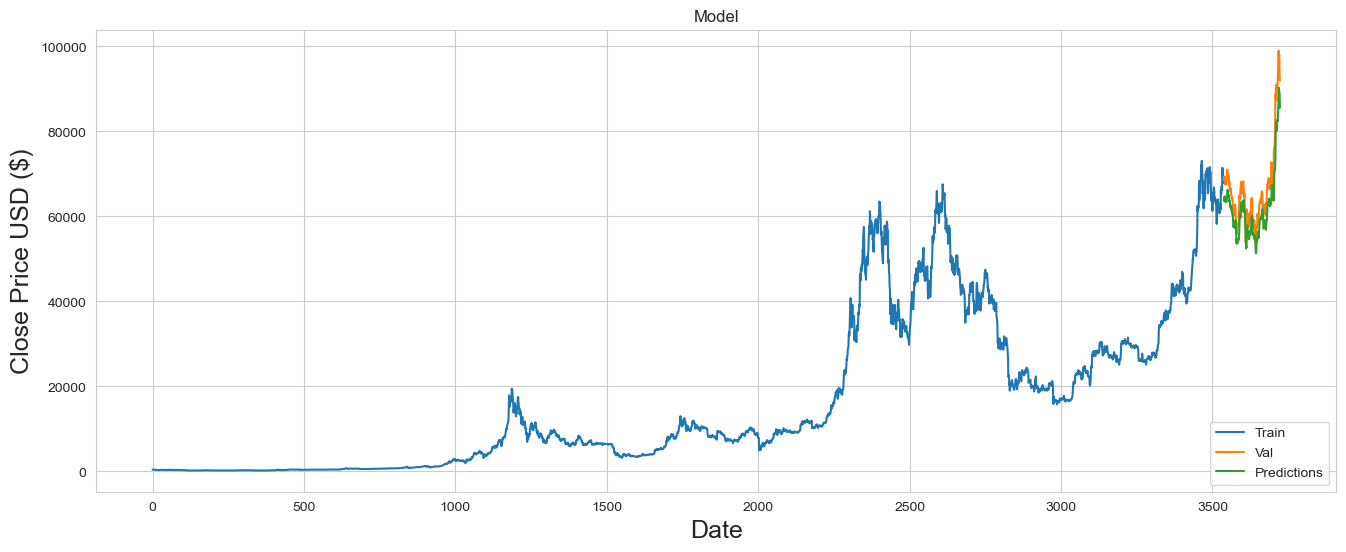

In [45]:
# Plot the data

train = data[:training_data_len]

valid = data[training_data_len:]

valid['Predictions'] = predictions

# Visualize the data

plt.figure(figsize=(16,6))

plt.title('Model')

plt.xlabel('Date', fontsize=18)

plt.ylabel('Close Price USD ($)', fontsize=18)

plt.plot(train['Close'])

plt.plot(valid[['Close', 'Predictions']])

plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')

plt.show()

---

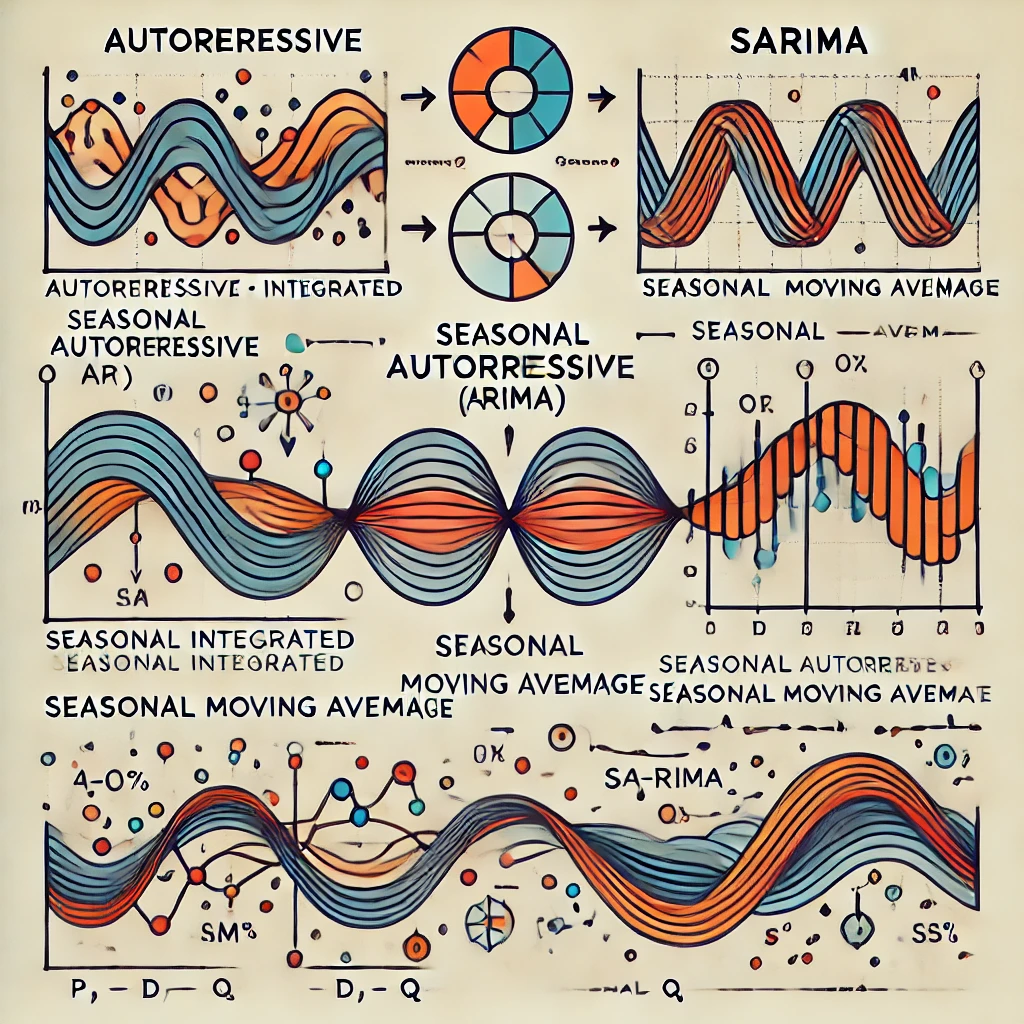

# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#34661c;">ARIMA and SARIMA</p>



**ARIMA** : Non-seasonal Autoregressive Integrated Moving Averages



**SARIMA** : Seasonal ARIMA



**SARIMAX** : Seasonal ARIMA with exogenous variables



If a time series, has seasonal patterns, then we need to add seasonal terms and it becomes SARIMA, short for Seasonal ARIMA.



## Steps for building ARIMA-SARIMA models:





#### 1. Check Stationarity: 

Verify the stationarity of each series using tests like ADF (Augmented Dickey-Fuller) and KPSS (Kwiatkowski-Phillips-Schmidt-Shin). Display with ACF and PACF plots.



#### 2. Make Series Stationary: 

Apply transformations to make the target and exogenous variables stationary if needed. Common methods include differencing and log transformations.



#### 3. Model the Relationship: 

Use the stationary series in your ARIMA or SARIMA model.



For ARIMA (AutoRegressive Integrated Moving Average) and SARIMA (Seasonal AutoRegressive Integrated Moving Average) models, it is essential to make the time series data stationary before fitting the model. These models assume that the time series data is stationary, meaning that its statistical properties such as mean, variance, and autocorrelation structure do not change over time. If the data is non-stationary, it can lead to biased parameter estimates and unreliable forecasts.



To make the data stationary, you typically need to remove trends and seasonality. This can be done through techniques like taking differences (for removing trends) and seasonal differencing (for removing seasonality). Once the data is stationary, you can then fit the ARIMA or SARIMA model to the transformed data.



# <div style="color:white;display:inline-block;border-radius:50px;background-color:brown;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:white;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b> </b>Check Stationarity</p></div>



>   

In [46]:
# stationarity check on data

from statsmodels.tsa.stattools import adfuller

def adf_test(df):

    result = adfuller(df)

    print('ADF Statistic: %f' % result[0])

    print('p-value: %f' % result[1])

    if result[1] <= 0.05:

        print("Reject the null hypothesis. Data is stationary")

    else:

        print("Fail to reject the null hypothesis. Data is not stationary")



adf_test(df['Close'])

ModuleNotFoundError: No module named 'statsmodels'

In [ ]:
# Importing required libraries

from statsmodels.tsa.seasonal import seasonal_decompose

import matplotlib.pyplot as plt



# Decompose the 'Close' column to see trend, seasonality, and residuals

decompose = seasonal_decompose(df['Close'], model='additive', period=30)



# Plot with customized colors

plt.figure(figsize=(10, 8))



# Plot Trend Component

plt.subplot(411)

plt.plot(df['Date'], decompose.trend, color='orangered', label='Trend')

plt.legend(loc='best')

plt.title('Trend Component')



# Plot Seasonal Component

plt.subplot(412)

plt.plot(df['Date'], decompose.seasonal, color='mediumseagreen', label='Seasonality')

plt.legend(loc='best')

plt.title('Seasonal Component')



# Plot Residual Component

plt.subplot(413)

plt.plot(df['Date'], decompose.resid, color='dodgerblue', label='Residual')

plt.legend(loc='best')

plt.title('Residual Component')



# Plot Observed (Original) Data

plt.subplot(414)

plt.plot(df['Date'], df['Close'], color='darkgray', label='Observed')

plt.legend(loc='best')

plt.title('Observed Data')



# Adjust layout to prevent overlap

plt.tight_layout()

plt.show()


# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#34661c;">ACF and Differencing Visualization</p>

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

import matplotlib.pyplot as plt



# Set custom style for better visuals

plt.style.use('seaborn-darkgrid')



# Create subplots for original series and differencing

fig, axes = plt.subplots(3, 2, figsize=(12, 10), sharex=False)



# Original Series

axes[0, 0].plot(df['Close'], color='royalblue')

axes[0, 0].set_title('Original Series', fontsize=14, color='darkred')

plot_acf(df['Close'], ax=axes[0, 1], lags=40, color='darkblue', title='ACF - Original')



# 1st Differencing

axes[1, 0].plot(df['Close'].diff(), color='orange')

axes[1, 0].set_title('1st Order Differencing', fontsize=14, color='darkgreen')

plot_acf(df['Close'].diff().dropna(), ax=axes[1, 1], lags=40, color='teal', title='ACF - 1st Diff')



# 2nd Differencing

axes[2, 0].plot(df['Close'].diff().diff(), color='purple')

axes[2, 0].set_title('2nd Order Differencing', fontsize=14, color='brown')

plot_acf(df['Close'].diff().diff().dropna(), ax=axes[2, 1], lags=40, color='magenta', title='ACF - 2nd Diff')



# Adjust layout and show the plot

plt.tight_layout()

plt.show()


## EXPLANTION

1. **Original Series**: Shows the raw data and its correlation at different time lags.  

2. **1st Differencing**: Removes trends to check stationarity and shows correlations after the first difference.  

3. **2nd Differencing**: Removes remaining trends/seasonality, showing deeper stationarity.  




---

## <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#34661c;">The meaning of p, d and q</p>











- p: 

    - p is the order of the Auto Regressive (AR) term. It refers to the number of lags of Y to be used as predictors.

<br>

- d:



    - The term Auto Regressive’ in ARIMA means it is a linear regression model that uses its own lags as predictors. Linear regression models, as we know, work best when the predictors are not correlated and are independent of each other. So we need to make the time series stationary.



    - The most common approach to make the series stationary is to difference it. That is, subtract the previous value from the current value. Sometimes, depending on the complexity of the series, more than one differencing may be needed.



    - The value of d, therefore, is the minimum number of differencing needed to make the series stationary. If the time series is already stationary, then d = 0.

<br>

- q: 

    - q is the order of the Moving Average (MA) term. It refers to the number of lagged forecast errors that should go into the ARIMA Model.

In [ ]:
# plots

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# pd.plotting.autocorrelation_plot(df['Close'])



# plot_acf(df['Close'], alpha=0.05)



from statsmodels.tsa.stattools import acf, pacf

x_acf = pd.DataFrame(acf(df['Close']))

print(x_acf)

# partial autocorrelation

from statsmodels.tsa.stattools import acf, pacf

plot_pacf(df['Close'], lags=20, alpha=0.05)

----

## <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#34661c;">ARIMA Model</p>

In [ ]:
# Split the data into training and testing datasets for arima 

train_data = dataset[:training_data_len, 0]  # First 95% for training

test_data = dataset[training_data_len:, 0]   # Remaining 5% for testing


In [ ]:
# Define ARIMA parameters (p, d, q)
from statsmodels.tsa.arima.model import ARIMA


p, d, q = 2, 1, 2  # You can tune these values for better results



# Create and fit the ARIMA model

arima_model = ARIMA(train_data, order=(p, d, q))

arima_fit = arima_model.fit()


In [ ]:
from sklearn.metrics import mean_squared_error

# Forecast for the remaining 5% of data

forecast_steps = len(test_data)  # Number of steps equals the test data length

arima_forecast = arima_fit.forecast(steps=forecast_steps)



# Calculate RMSE for evaluation

rmse = np.sqrt(mean_squared_error(test_data, arima_forecast))

print(f"ARIMA RMSE: {rmse}")


---

## <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#34661c;">SARIMA Model</p>

In [ ]:

from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define SARIMA parameters



# (P, D, Q, s) for seasonal component (s = 12 for monthly seasonality, adjust as needed)

p, d, q = 2, 1, 2

P, D, Q, s = 1, 1, 1, 12  # Adjust `s` if there's no seasonality in your data



# Create and fit the SARIMA model

sarima_model = SARIMAX(train_data, 

                       order=(p, d, q), 

                       seasonal_order=(P, D, Q, s), 

                       enforce_stationarity=False, 

                       enforce_invertibility=False)

sarima_fit = sarima_model.fit(disp=False)


In [ ]:
# Forecast for the remaining 5% of data

forecast_steps = len(test_data)  # Number of steps equals the test data length

sarima_forecast = sarima_fit.forecast(steps=forecast_steps)



# Calculate RMSE for evaluation

rmse = np.sqrt(mean_squared_error(test_data, sarima_forecast))

print(f"SARIMA RMSE: {rmse}")


In [ ]:
sarima_forecast.max()

In [ ]:
# Plot the data and SARIMA forecast

plt.figure(figsize=(12, 6))

plt.plot(range(len(train_data)), train_data, label='Training Data')

plt.plot(range(len(train_data), len(train_data) + len(test_data)), test_data, label='Test Data')

plt.plot(range(len(train_data), len(train_data) + len(test_data)), sarima_forecast, label='SARIMA Forecast', color='red')

plt.title('SARIMA Model: Forecast vs Actual')

plt.xlabel('Time')

plt.ylabel('Close Price')

plt.legend()

plt.show()


---



The **LSTM model** is the best option based on your RMSE values:



- **LSTM RMSE: 2162.46** (lowest error and highest prediction accuracy)

- **ARIMA RMSE: 9652.54** (higher error than LSTM)

- **SARIMA RMSE: 10035.77** (highest error among the three)



### Why LSTM is Best:

1. **Nonlinear Modeling**: LSTM can handle complex, nonlinear patterns in time series data, which ARIMA and SARIMA may not capture effectively.

2. **Sequential Memory**: LSTM's ability to learn long-term dependencies in data makes it more suited for tasks where past trends impact future values.

3. **Lower RMSE**: The much lower RMSE value for LSTM indicates significantly better performance in forecasting compared to statistical models.



---


